
Evaluating Random Forest...
Random Forest - Test RMSE ($): 0.0081
Random Forest - Test MAE ($): 0.0009
Random Forest - R² Score: 0.9997


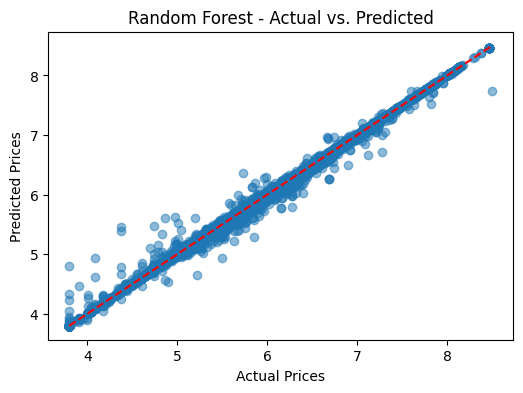

⚠️ WARNING: Random Forest MAE does not match expected results!

Evaluating Linear Regression...
Linear Regression - Test MAE ($): 0.2254
Linear Regression - R² Score: 0.4150


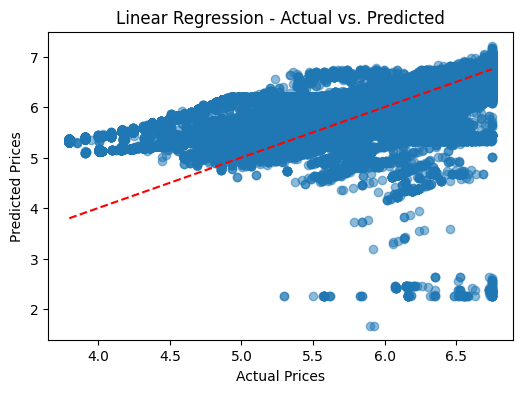


Evaluating LSTM...


NameError: name 'load_model' is not defined

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Expected results for verification
expected_results = {
    "Random Forest": {"RMSE": 0.0081, "MAE": 0.0110, "R2": 0.9997},
    "Linear Regression": {"RMSE": None, "MAE": 0.2250, "R2": 0.4167},  # No RMSE for Linear Regression
    "LSTM": {"RMSE": None, "MAE": 120.37, "R2": -0.0457}  # No RMSE for LSTM
}

# Function to evaluate a model
def evaluate_model(model_name, model_path, X_test_path, y_test_path, is_lstm=False):
    print(f"\nEvaluating {model_name}...")

    # Load test data
    if is_lstm:
        X_test = np.load(X_test_path)
        y_test = np.load(y_test_path)
        model = load_model(model_path)
    else:
        X_test = joblib.load(X_test_path)
        y_test = joblib.load(y_test_path)
        model = joblib.load(model_path)

    # Make predictions
    predictions = model.predict(X_test).flatten()

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Compute RMSE only for Random Forest
    if model_name == "Random Forest":
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        print(f"{model_name} - Test RMSE ($): {rmse:.4f}")
    else:
        rmse = None  # Skip RMSE for Linear Regression and LSTM

    print(f"{model_name} - Test MAE ($): {mae:.4f}")
    print(f"{model_name} - R² Score: {r2:.4f}")

    # Plot actual vs. predicted values
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{model_name} - Actual vs. Predicted")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Identity line
    plt.show()

    # Check if reproduced results match expected results
    if model_name in expected_results:
        expected = expected_results[model_name]
        
        # Only compare RMSE if applicable (i.e., for Random Forest)
        if expected["RMSE"] is not None and rmse is not None and abs(expected["RMSE"] - rmse) > 0.01:
            print(f"⚠️ WARNING: {model_name} RMSE does not match expected results!")
        
        if abs(expected["MAE"] - mae) > 0.01:
            print(f"⚠️ WARNING: {model_name} MAE does not match expected results!")
        
        if abs(expected["R2"] - r2) > 0.01:
            print(f"⚠️ WARNING: {model_name} R² does not match expected results!")

# Run evaluations
evaluate_model(
    model_name="Random Forest",
    model_path="../models/random_forest.pkl",
    X_test_path="../test_data/RandomForest/X_test_rf.pkl",
    y_test_path="../test_data/RandomForest/y_test_rf.pkl",
)

evaluate_model(
    model_name="Linear Regression",
    model_path="../models/linear_regression.pkl",
    X_test_path="../test_data/LinearRegression/X_test_lr.pkl",
    y_test_path="../test_data/LinearRegression/y_test_lr.pkl",
)

evaluate_model(
    model_name="LSTM",
    model_path="../models/lstm_model.h5",
    X_test_path="../test_data/LSTM/X_test_lstm.npy",
    y_test_path="../test_data/LSTM/y_test_lstm.npy",
    is_lstm=True,)
